### trapezoidal_integration of the wave spectrum

The total energy of a wave spectrum is found by summing the area under the curve. The way we do this is by calculating the area of each of the trapezoids formed by adjacent spectral variance ($y$-axis) and multiplying by the spacing along the $y$-axis $\Delta f$, and summing all of those areas up to get the total area under the curve. We use the *scipy.intergrate.trapezoid* function to do that.

The wave spectrum has units of $m^2/Hz$, so it is actually a variance density spectrum...we would need to multiply by water density $\rho$ and gravitational acceleration $g$ to convert to energy units. 
But most people use energy density and variance density interchangebly.

This notebook
* makes a fake JONSWAP spectrum
* calculate the *zero$^{th}$ moment* $H_{m0}$ (equivlent to the mean) by integrating the area under the spectrum
* and makes a two-panel figure that hopefully explains the proceedure.


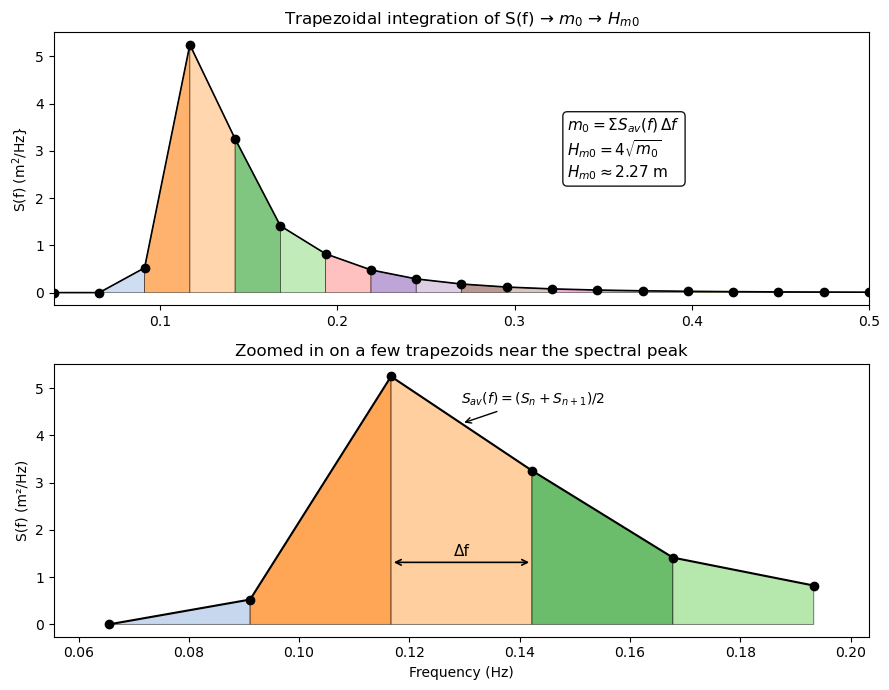

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Make a fake spectrum with these JONSWAP spectrum parameters
g = 9.81
Hs_target = 1.0
Tp = 8.0
fp = 1.0 / Tp
gamma = 3.3

# small number of frequency bins for simplicity and easier visualization
f = np.linspace(0.04, 0.50, 19)           # 19 frequency bins
sigma = np.where(f <= fp, 0.07, 0.09) 
r = np.exp(-0.5 * ((f - fp)/(sigma*fp))**2)
alpha = 0.076 * (Hs_target**2 * fp**4 / g**2)**0.22
S = alpha * g**2 * (2*np.pi)**(-4) * f**(-5) * np.exp(-1.25*(fp/f)**4) * (gamma**r)

# integrate the spectrum to get m0
# trapezoidal integration uses the area rule for trapezoids
m0 = integrate.trapezoid(S, f)
# and use the definition of Hm0
Hm0 = 4*np.sqrt(m0)

# colormap with distinct colors
cmap = plt.cm.tab20
colors = [cmap(i / (len(f)-2)) for i in range(len(f)-1)]

# two panel figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 7))

# full spectrum
ax1.plot(f, S, marker="o", color="k", lw=1.2)
for i in range(len(f)-1):
    x0, x1 = f[i], f[i+1]
    y0, y1 = S[i], S[i+1]
    ax1.fill([x0, x0, x1, x1], [0, y0, y1, 0],
             facecolor=colors[i], alpha=0.6, edgecolor="k", linewidth=0.5)

ax1.set_xlim(f.min(), f.max())
ax1.set_ylabel("S(f) (m$^2$/Hz}")
ax1.set_title("Trapezoidal integration of S(f) → $m_0$ → $H_{m0}$")
ax1.text(0.63, 0.47,
         r"$m_0 = \Sigma S_{av}(f)\,\Delta f$" "\n"
         r"$H_{m0} = 4\sqrt{m_0}$" f"\n$H_{{m0}}\\approx{Hm0:.2f}$ m",
         transform=ax1.transAxes,
         bbox=dict(boxstyle="round", fc="w", alpha=0.9), fontsize=11)

# zoom in on a few trapezoids
ip = np.argmax(S)
k = 2
i_lo = max(ip - k, 0)
i_hi = min(ip + k + 1, len(f)-1)

ax2.plot(f[i_lo:i_hi+1], S[i_lo:i_hi+1], marker="o", color="k", lw=1.5)
for i in range(i_lo, i_hi):
    x0, x1 = f[i], f[i+1]
    y0, y1 = S[i], S[i+1]
    ax2.fill([x0, x0, x1, x1], [0, y0, y1, 0],
             facecolor=colors[i], alpha=0.7, edgecolor="k", linewidth=0.5)

# place some notation to indicate delta f
i_demo = ip
x0, x1 = f[i_demo], f[i_demo+1]
y_max = max(S[i_lo:i_hi+1])
y_arrow = 0.25 * y_max  # one-quarter up from x-axis
ax2.annotate("", xy=(x0, y_arrow), xytext=(x1, y_arrow),
             arrowprops=dict(arrowstyle="<->", lw=1.2))
ax2.text(0.5*(x0 + x1), y_arrow * 1.05, "Δf", ha="center", va="bottom", fontsize=11)

# --- average height arrow ---
y0, y1 = S[i_demo], S[i_demo+1]
x_mid = 0.5*(x0 + x1)
y_mid = 0.5*(y0 + y1)
ax2.annotate("$S_{av}(f) =  (S_n+S_{n+1})$/2",
             xy=(x_mid, y_mid), xytext=(x_mid, y_mid*1.1),
             arrowprops=dict(arrowstyle="->"), ha="left", fontsize=10)

ax2.set_xlim(f[i_lo]-0.01, f[i_hi]+0.01)
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("S(f) (m²/Hz)")
ax2.set_title("Zoomed in on a few trapezoids near the spectral peak")

plt.tight_layout()
plt.show()

